In [ ]:
## Project: Advertising Spend vs Sales Regression
#This notebook trains a Linear Regression model to predict Sales based on advertising spends on TV, Radio, and Newspaper.


In [75]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns

In [77]:
data= pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv")

In [78]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [79]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [80]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [81]:
data.dropna()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [82]:
X= data[['TV', 'Radio', 'Newspaper']]

Y=data['Sales']

In [83]:
# train test split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state= 0)


In [84]:
#linear regressioin fit 
model= LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
#prediction based on X_test
y_predict= model.predict(x_test)
y_predict

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [86]:

#mean squareed error
mse=mean_squared_error(y_test,y_predict)

mse


4.40211829144968

In [87]:
#r square
r2= r2_score(y_test, y_predict)
r2

0.8601145185017869

In [88]:
#intercept
model.intercept_


np.float64(2.994893030495323)

In [89]:
#coefficient
model.coef_[0]


np.float64(0.044584020119964325)

In [90]:
#predicting on new input values of X
input= pd.DataFrame({'TV':[124],
                    'Radio':[50],
                    'Newspaper':[55]
                    })
predicted= model.predict(input)
print("predicted sales:", predicted)

predicted sales: [18.19518271]


Text(0, 0.5, 'predicted sales')

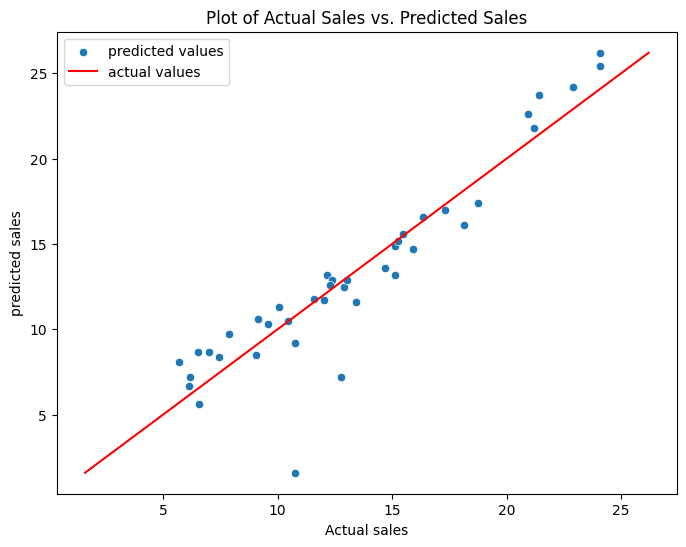

In [106]:
#plot 
plt.figure(figsize= (8,6))
sns.scatterplot(x=y_predict, y=y_test, label= 'predicted values')
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'r', label= 'actual values')
plt.title('Plot of Actual Sales vs. Predicted Sales')
plt.legend()
plt.xlabel('Actual sales')
plt.ylabel('predicted sales')

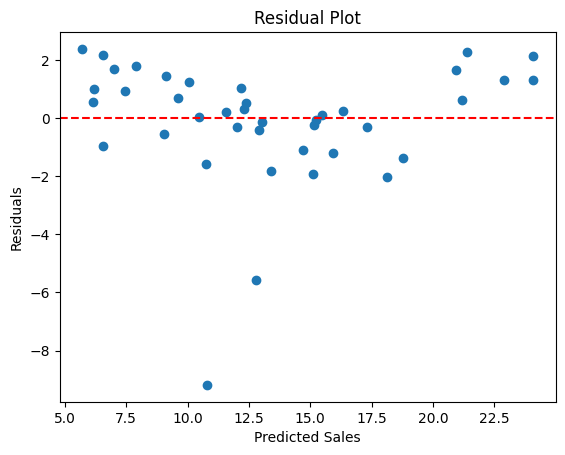

In [108]:

#residual polt
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
